In [1]:

import os
import sys
import glob
import pickle
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import keras_tuner as kt
import matplotlib.pyplot as plt


sys.path.append("../src")


from extract_text_embedding import LstmAe 
from extract_text_embedding import TuneApplyLstmAe
from extract_text_embedding import GetConvertedData





tfk = tf.keras
tfkl = tf.keras.layers



2024-04-09 15:07:17.972157: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-09 15:07:17.972175: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



# Visualize the results

In [15]:

df_x = pd.read_csv("../data/medium_data_df_x.csv")
x = pd.read_csv("../data/medium_data_x.csv")

df_m = pd.read_csv("../data/medium_movies_data.csv")


df_x.shape, df_m.shape


((2231, 27), (2262, 19))

In [16]:
x.shape

(2230, 25)

In [3]:


def rt_class(row):
    if row["Tomato Meter"] >= 0.75:
        val = 1
    elif 0.6 <= row["Tomato Meter"] < 0.75:
        val = 2
    else:
        val = 3
        
    return val

In [4]:
df_m["RT"] = df_m.apply(rt_class, axis=1)



In [5]:
df_m

Title   
0                      The Color Purple  \
1                    The Beekeeper 2024   
2          Aquaman And The Lost Kingdom   
3                         Napoleon 2023   
4                        Uncharted 2022   
...                                 ...   
2257            In A Valley Of Violence   
2258                          The Rider   
2259                         Blackthorn   
2260                   The Keeping Room   
2261  Marlina The Murderer In Four Acts   

                                               Synopsis Original Language   
0     A story of love and resilience based on the no...               Eng  \
1     In The Beekeeper, one man's brutal campaign fo...               Eng   
2     After failing to defeat Aquaman the first time...               Eng   
3     "Napoleon" is a spectacle-filled action epic t...               Eng   
4     Street-smart thief Nathan Drake (Tom Holland) ...               Eng   
...                                                 ...               ...   
2257  A mysterious drifter (Ethan Hawke) and his dog...               Eng   
2258  After a riding accident leaves him unable to c...               Eng   
2259  Leaving Bolivia and heading back to the U.S., ...               Eng   
2260  During the waning days of the Civil War, two S...               Eng   
2261  When a young widow is raped and her cattle are...               Ind   

      Runtime         Director   
0         141   Blitz Bazawule  \
1         105       David Ayer   
2         124        James Wan   
3         158     Ridley Scott   
4         116  Ruben Fleischer   
...       ...              ...   
2257      104          Ti West   
2258      104       Chloé Zhao   
2259       98        Mateo Gil   
2260       95    Daniel Barber   
2261       95      Mouly Surya   

                                               Producer   
0     Oprah Winfrey, Steven Spielberg, Scott Sanders...  \
1     Bill Block, Jason Statham, Chris Long, Kurt Wi...   
2                    Peter Safran, James Wan, Rob Cowan   
3             Mark Huffam, Ridley Scott, Kevin J. Walsh   
4       Charles Roven, Avi Arad, Alex Gartner, Ari Arad   
...                                                 ...   
2257               Jason Blum, Jacob Jaffke, Peter Phok   
2258  Mollye Asher, Sacha Ben Harroche, Bert Hamelin...   
2259                    Andres Santana, Ibón Cormenzana   
2260  Jordan Horowitz, Judd Payne, Matt Williams, Da...   
2261                             Rama Adi, Fauzan Zidni   

                                       Writer   
0                              Marcus Gardley  \
1                                 Kurt Wimmer   
2             David Leslie Johnson-McGoldrick   
3                                David Scarpa   
4     Rafe Judkins, Art Marcum, Matt Holloway   
...                                       ...   
2257                                  Ti West   
2258                               Chloé Zhao   
2259                            Miguel Barros   
2260                               Julia Hart   
2261     Rama Adi, Garin Nugroho, Mouly Surya   

                                               Top Cast   
0     ['Taraji P. Henson', 'Shug Avery', 'Danielle B...  \
1     ['Jason Statham', 'Adam Clay', 'Jeremy Irons',...   
2     ['Jason Momoa', 'Arthur', 'Patrick Wilson', 'O...   
3     ['Joaquin Phoenix', 'Napoleon Bonaparte', 'Van...   
4     ['Tom Holland', 'Nathan Drake', 'Mark Wahlberg...   
...                                                 ...   
2257  ['Ethan Hawke', 'Paul', 'John Travolta', 'Mars...   
2258  ['Brady Jandreau', 'Brady Blackburn', 'Tim Jan...   
2259  ['Sam Shepard', 'James Blackthorn, Butch Cassi...   
2260  ['Brit Marling', 'Augusta', 'Hailee Steinfeld'...   
2261  ['Marsha Timothy', 'Marlina', 'Egy Fedly', 'Ma...   

                                   Distributor   
0                        Warner Bros. Pictures  \
1                                          MGM   
2                        W

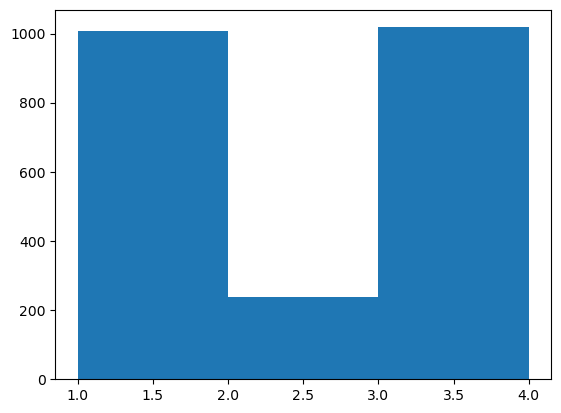

In [6]:

cnt, bins, _ = plt.hist(df_m.RT, bins=[1, 2, 3, 4])
plt.show()


In [7]:
bins

array([1, 2, 3, 4])

In [8]:
cnt

array([1006.,  238., 1018.])

In [27]:

a = df_x_g.describe()


In [29]:


a


Runtime                                               
                     count        mean        std   min     25%    50%   
Genre                                                                    
Action               206.0  122.048544  21.058746  81.0  107.00  118.5  \
Adventure             57.0  123.105263  21.207886  79.0  110.00  123.0   
Biography            132.0  120.924242  20.213223  85.0  107.75  118.5   
Comedy               225.0  105.835556  16.281688  66.0   95.00  105.0   
Crime                111.0  121.900901  20.246192  90.0  109.00  118.0   
Documentary           71.0   99.971831  13.859470  68.0   91.00   99.0   
Drama                197.0  114.340102  19.048302  69.0   99.00  112.0   
Fantasy               52.0  123.442308  23.862690  88.0  107.50  120.5   
History              111.0  127.819820  23.729996  89.0  112.50  122.0   
Holiday               79.0  102.126582  13.760187  78.0   91.50  101.0   
Horror               155.0  103.870968  13.496854  77.0   94.00  101.0   
Kids & family        292.0   97.523973  14.248751  72.0   88.00   95.0   
Musical               58.0  113.431034  19.217236  80.0   95.75  113.5   
Mystery & thriller   117.0  114.085470  17.474895  85.0  101.00  111.0   
Romance              149.0  110.422819  16.776021  80.0  100.00  109.0   
Sci-fi               134.0  120.888060  18.203800  85.0  109.00  119.5   
War                   47.0  128.361702  18.990187  90.0  116.00  128.0   
Western               38.0  118.789474  19.870062  91.0  102.50  116.5   

                                  Box Office (Gross USA)                ...   
                       75%    max                  count          mean  ...   
Genre                                                                   ...   
Action              133.00  208.0                  206.0  1.355932e+08  ...  \
Adventure           136.00  179.0                   57.0  1.249315e+08  ...   
Biography           129.00  216.0                  132.0  2.369814e+07  ...   
Comedy              114.00  189.0                  225.0  4.479138e+07  ...   
Crime               130.00  206.0                  111.0  3.697645e+07  ...   
Documentary         107.00  150.0                   71.0  3.895456e+06  ...   
Drama               127.00  189.0                  197.0  2.430002e+07  ...   
Fantasy             134.00  180.0                   52.0  9.682931e+07  ...   
History             139.50  195.0                  111.0  3.779700e+07  ...   
Holiday             109.00  150.0                   79.0  3.640727e+07  ...   
Horror              111.00  152.0                  155.0  4.076680e+07  ...   
Kids & family       103.00  174.0                  292.0  1.085165e+08  ...   
Musical             126.00  158.0                   58.0  4.703991e+07  ...   
Mystery & thriller  125.00  158.0                  117.0  3.632726e+07  ...   
Romance             118.00  222.0                  149.0  5.579657e+07  ...   
Sci-fi              133.00  192.0                  134.0  1.060154e+08  ...   
War                 138.50  183.0                   47.0  5.299730e+07  ...   
Western             129.75  168.0                   38.0  3.042135e+07  ...   

                   Embedding-1998           Embedding-1999             
                              75%       max          count      mean   
Genre                                                                  
Action                   0.017665  0.035701          206.0  0.014189  \
Adventure                0.019058  0.038363           57.0  0.015153   
Biography                0.023094  0.036417          132.0  0.016618   
Comedy                   0.021793  0.033972          225.0  0.016041   
Crime                    0.018930  0.033269          111.0  0.015085   
Documentary              0.031356  0.035196           71.0  0.019915   
Drama                    0.023779  0.036312          197.0  0.017232   
Fantasy                  0.014749  0.031865           52.0  0.013176   
History     

In [9]:


def plot_graphs(train_loss, val_loss, metric, title):
    plt.plot(train_loss)
    plt.plot(val_loss, '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.title(title)
    plt.show()
    
    

In [10]:

# with open("../LSTM-AE_configs.pickle", "rb") as fp:
#     results = pickle.load(fp)

# results

In [11]:


files = glob.glob("../tmp_results/*.pickle")
files



['../tmp_results/LSTM-AE_medium_movies_data(1e-05, 100, 10, 2, 100).pickle',
 '../tmp_results/LSTM-AE_large_movies_data(1e-05, 10, 5, 1, 100).pickle',
 '../tmp_results/LSTM-AE_large_movies_data(1e-05, 10, 50, 1, 100).pickle',
 '../tmp_results/LSTM-AE_large_movies_data(1e-05, 10, 10, 1, 175).pickle',
 '../tmp_results/LSTM-AE_medium_movies_data(1e-05, 10, 50, 2, 175).pickle',
 '../tmp_results/LSTM-AE_large_movies_data(1e-05, 100, 100, 2, 100).pickle',
 '../tmp_results/LSTM-AE_large_movies_data(1e-05, 10, 5, 1, 175).pickle',
 '../tmp_results/LSTM-AE_large_movies_data(1e-05, 10, 5, 2, 10).pickle',
 '../tmp_results/LSTM-AE_large_movies_data(1e-05, 10, 10, 1, 10).pickle',
 '../tmp_results/LSTM-AE_medium_movies_data(1e-05, 10, 100, 2, 175).pickle',
 '../tmp_results/LSTM-AE_large_movies_data(1e-05, 100, 5, 2, 10).pickle',
 '../tmp_results/LSTM-AE_(1e-05, 100, 50, 1, 100).pickle',
 '../tmp_results/LSTM-AE_large_movies_data(1e-05, 100, 100, 1, 175).pickle',
 '../tmp_results/LSTM-AE_medium_movies

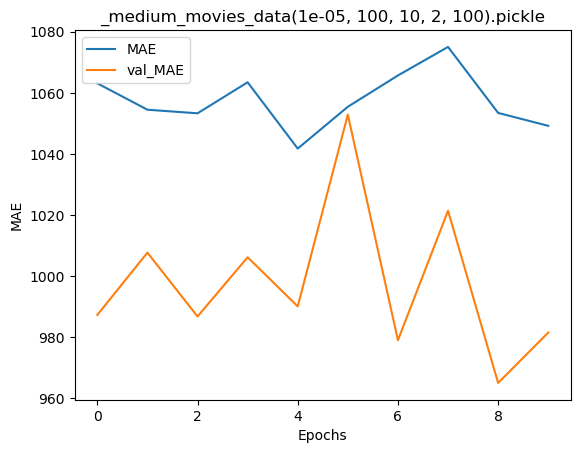

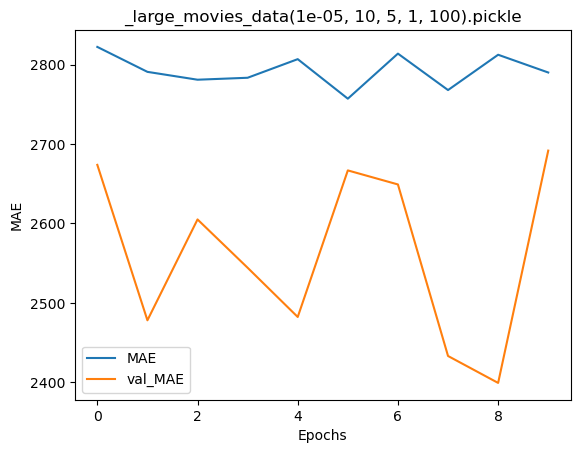

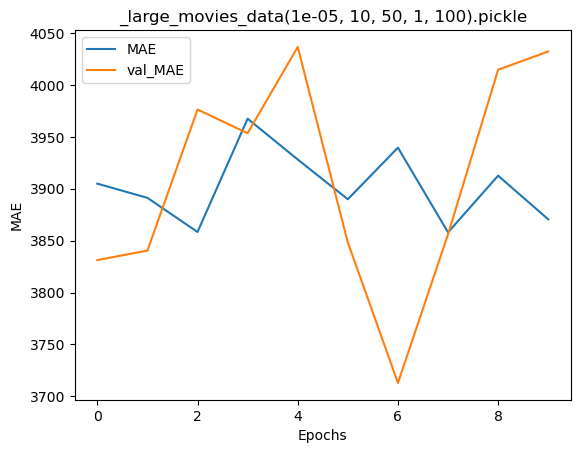

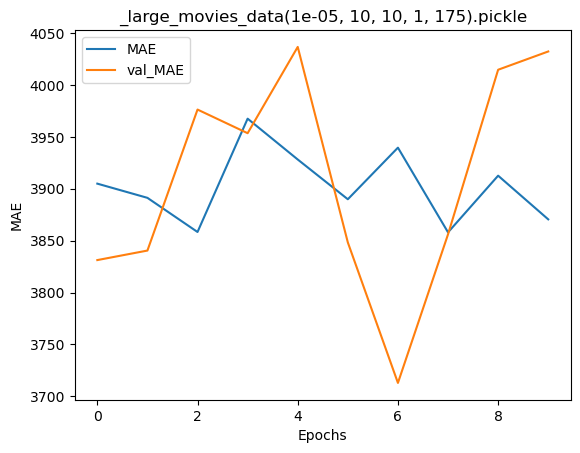

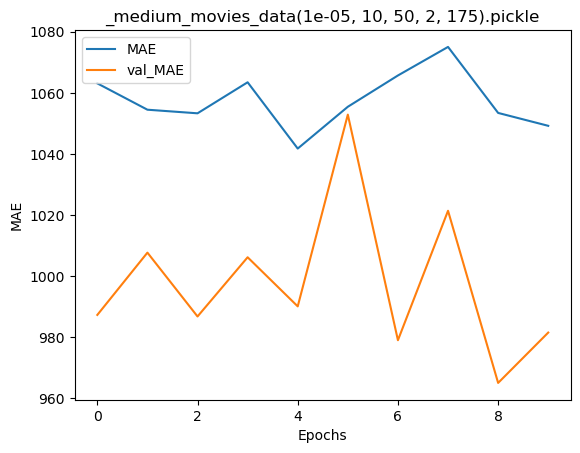

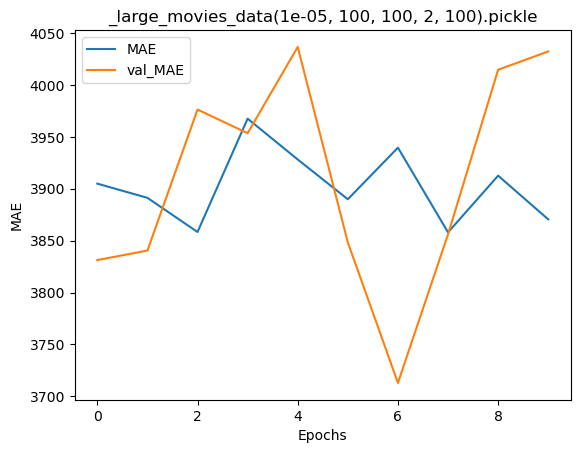

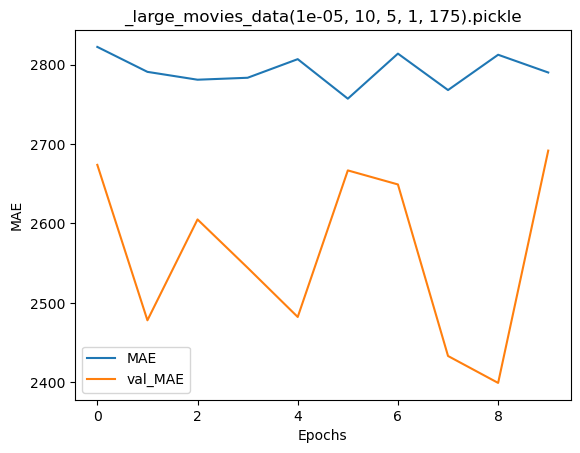

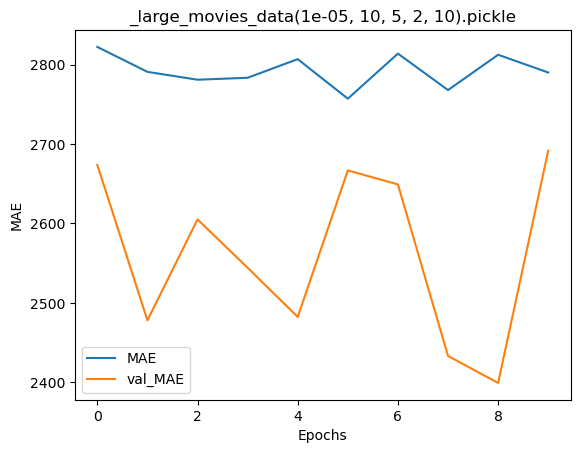

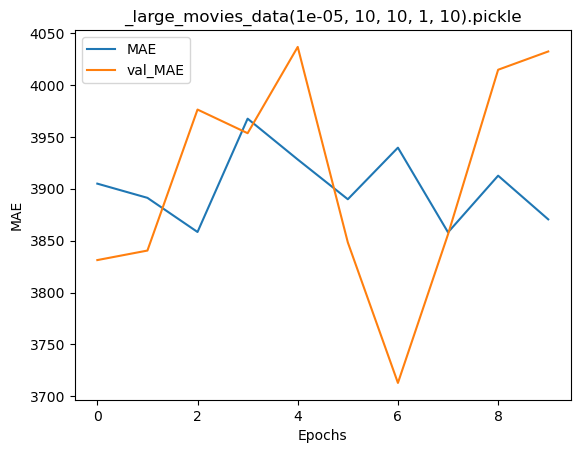

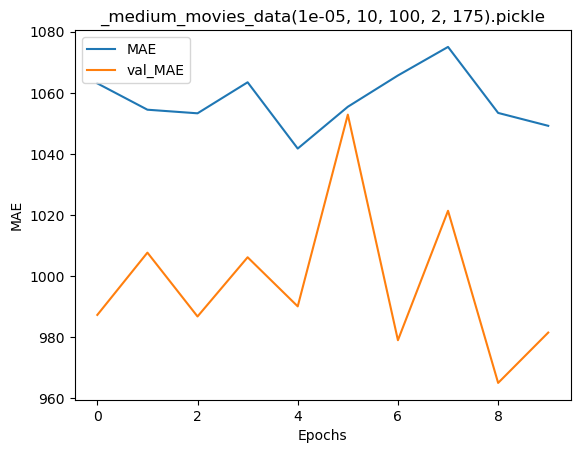

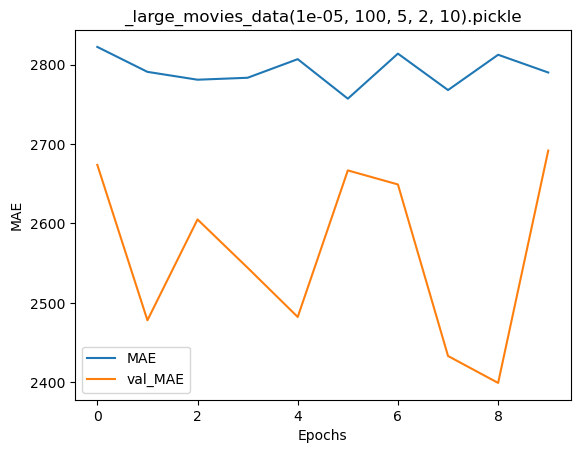

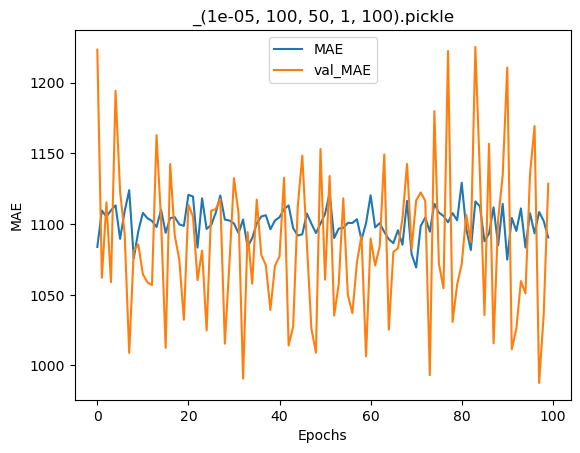

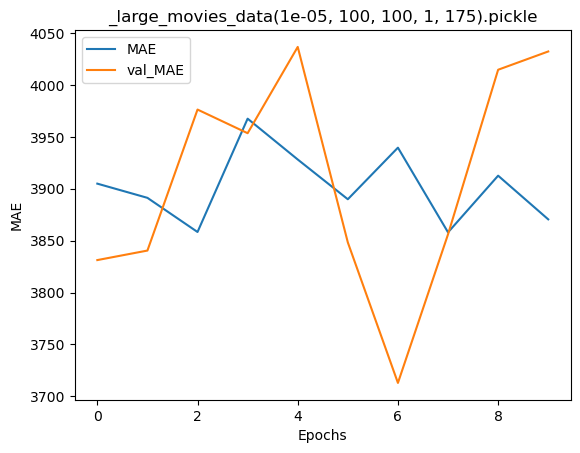

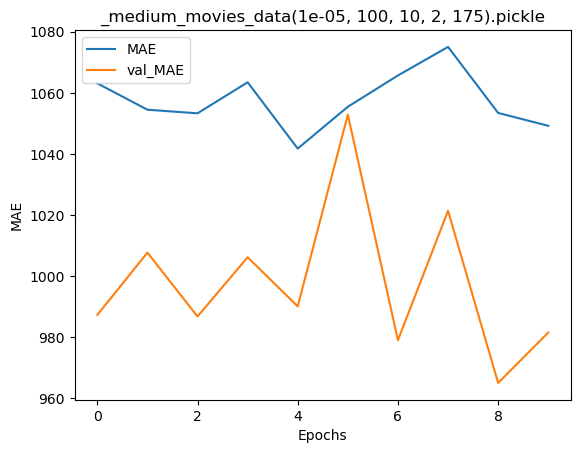

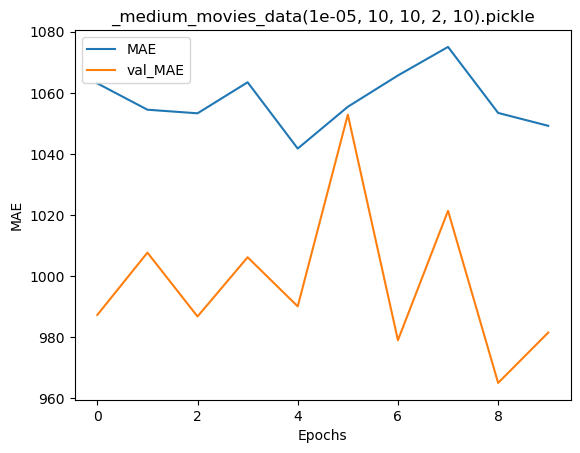

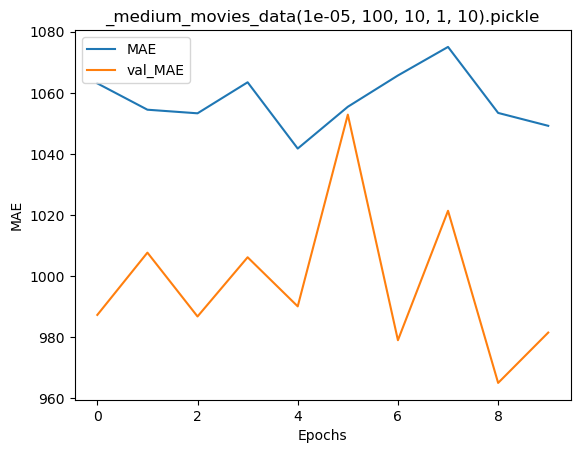

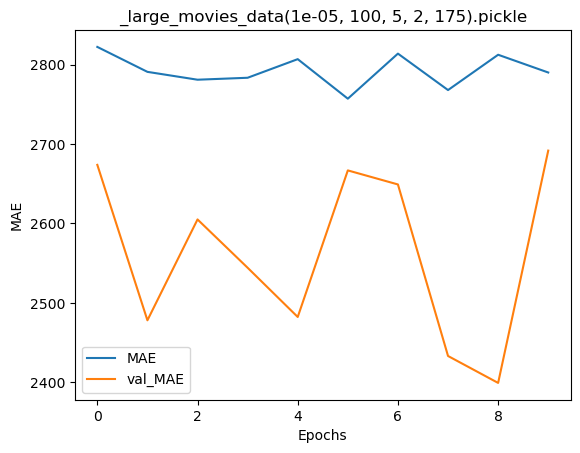

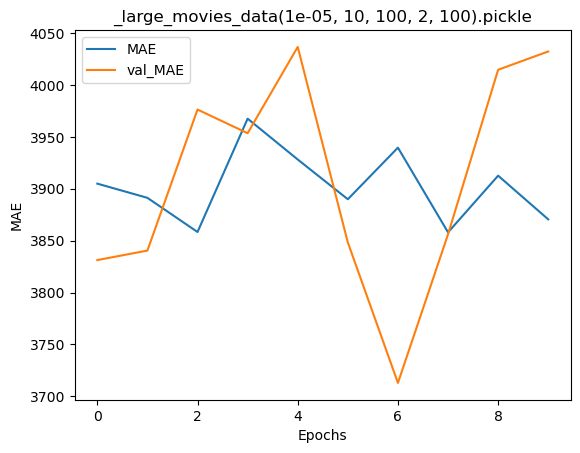

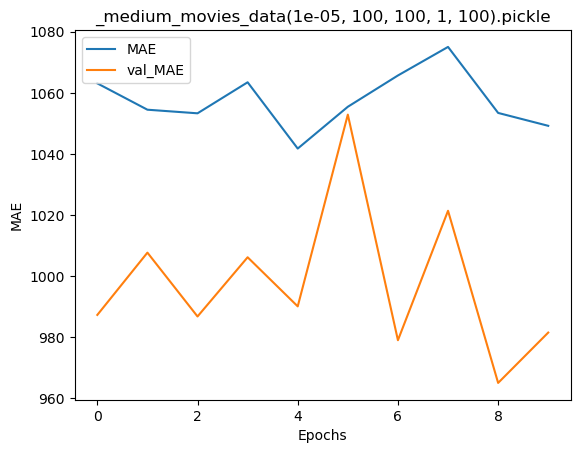

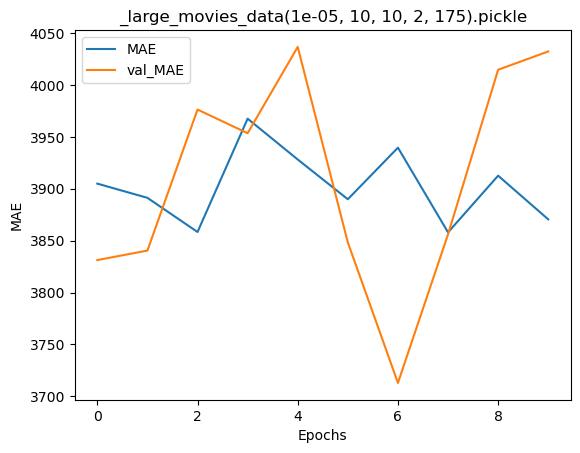

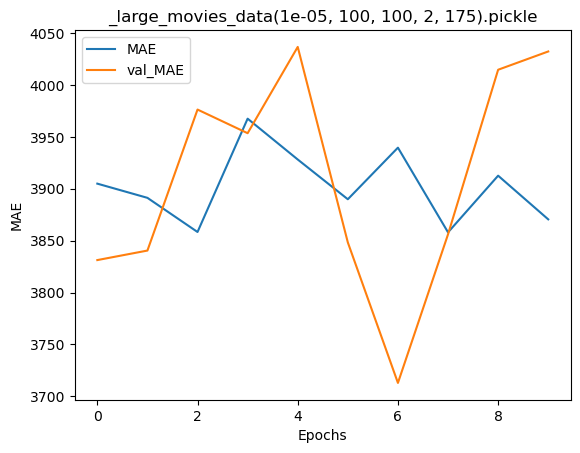

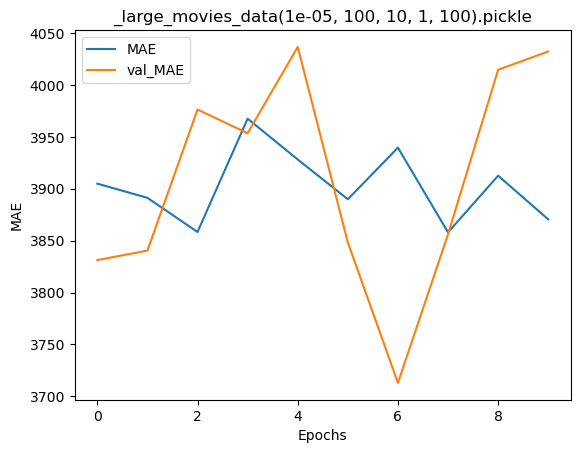

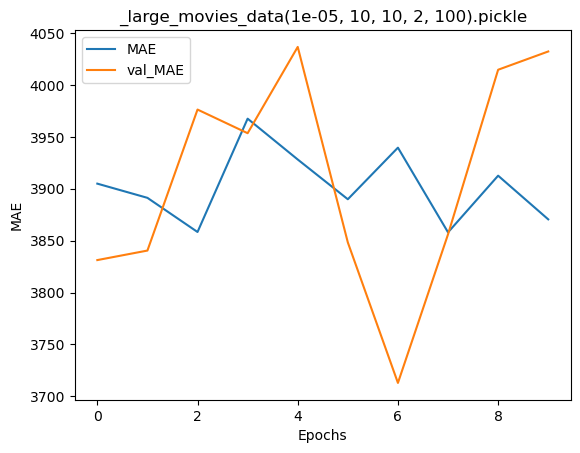

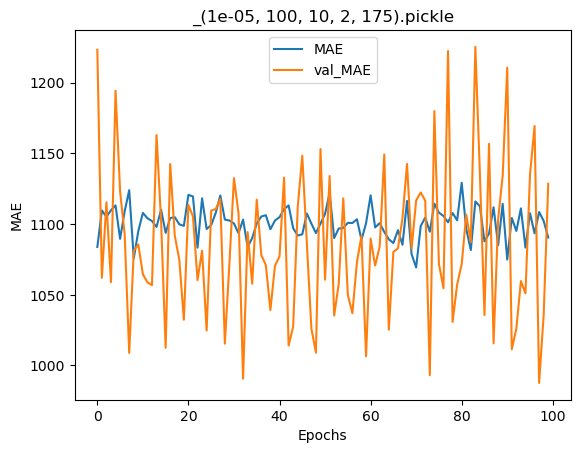

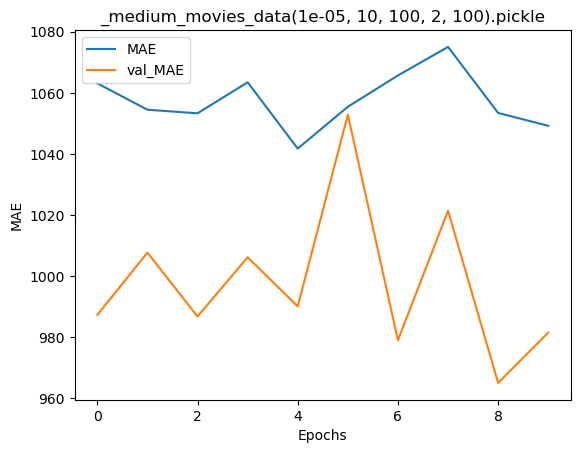

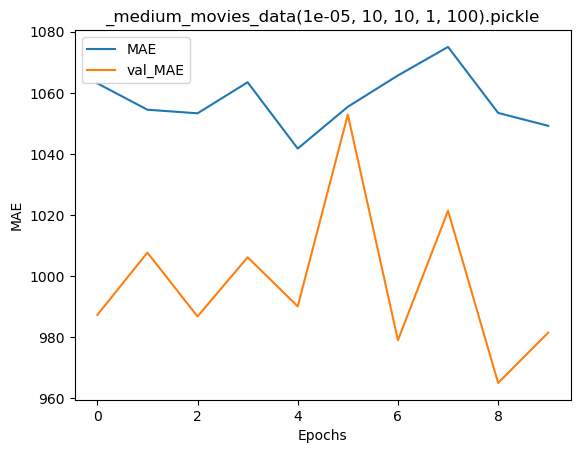

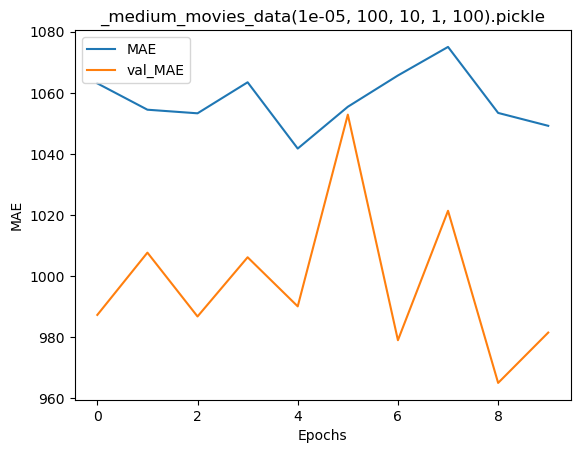

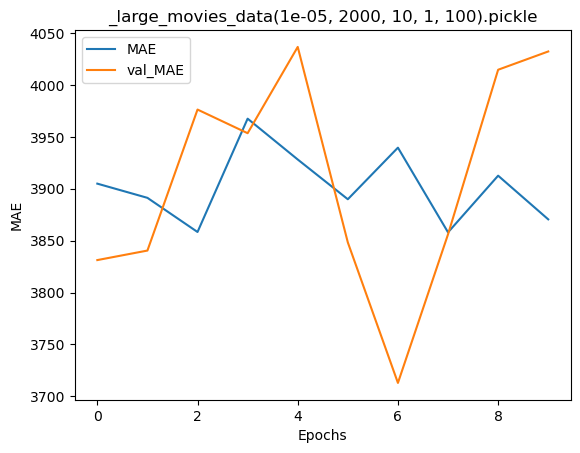

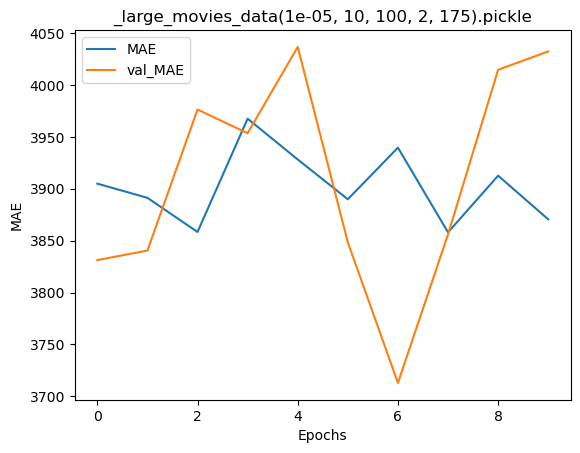

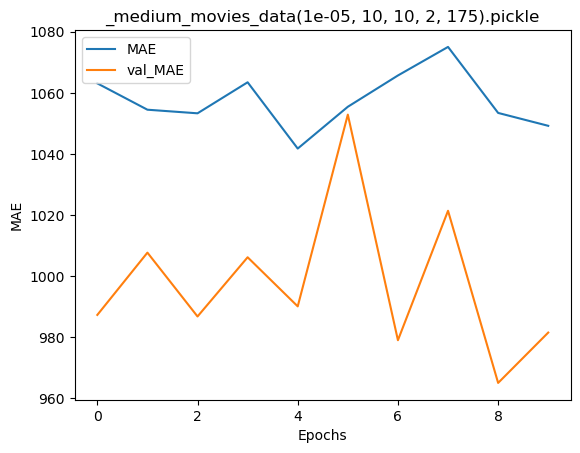

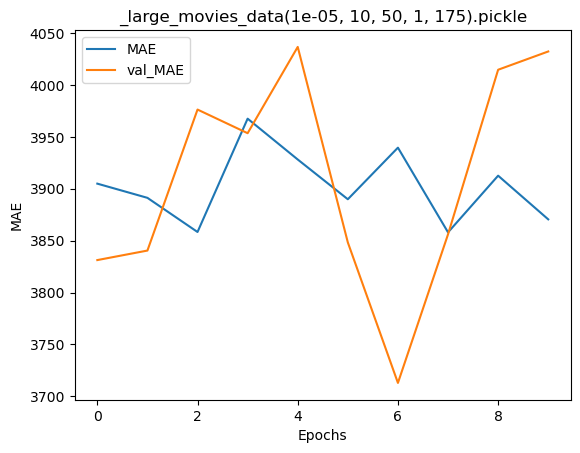

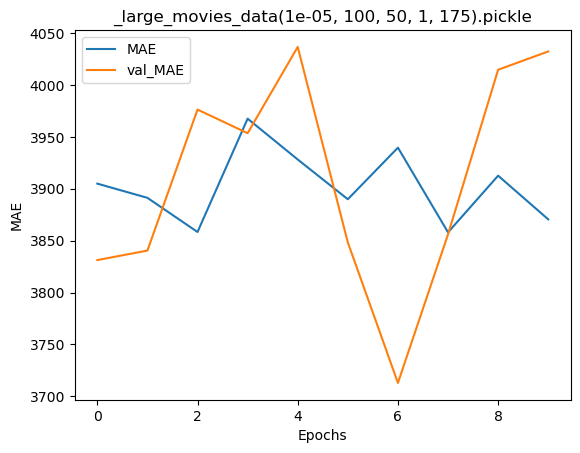

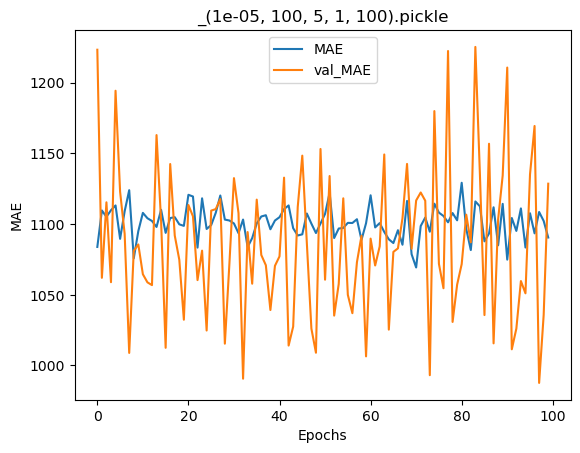

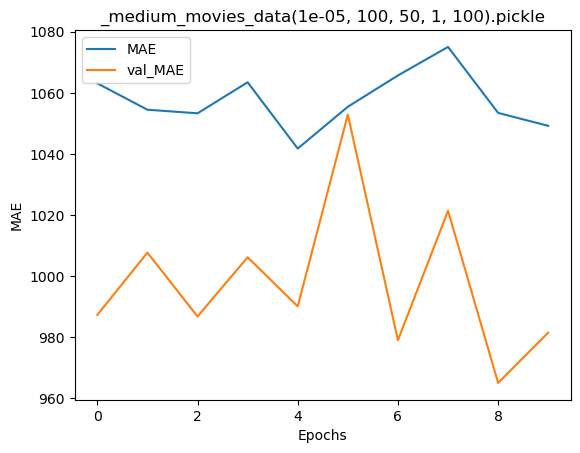

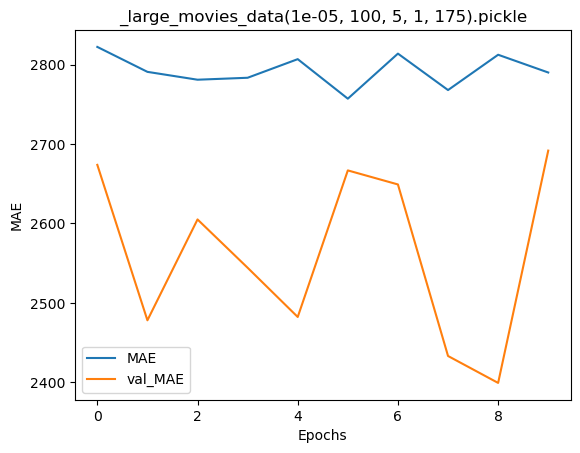

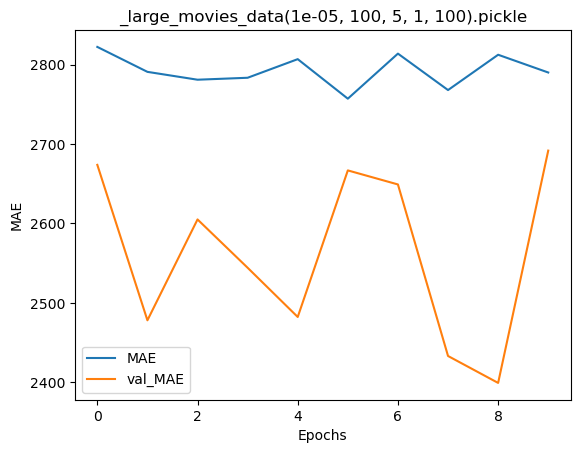

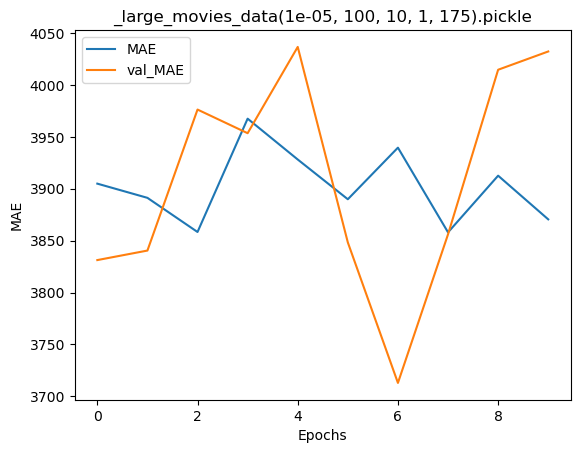

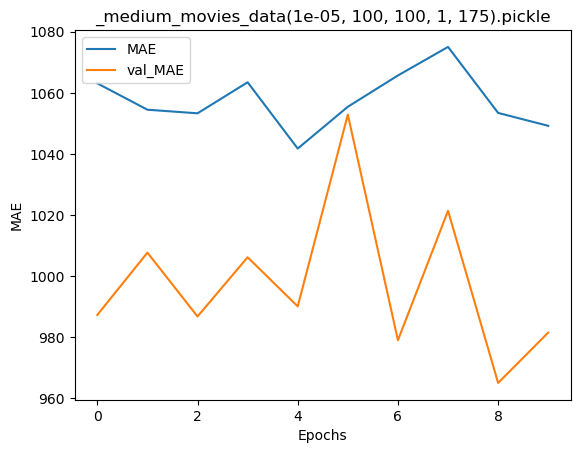

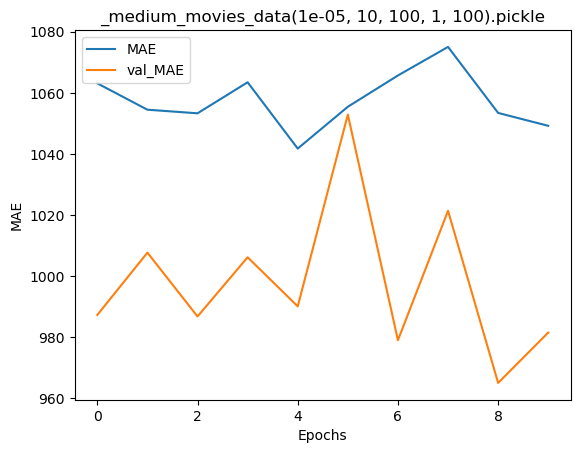

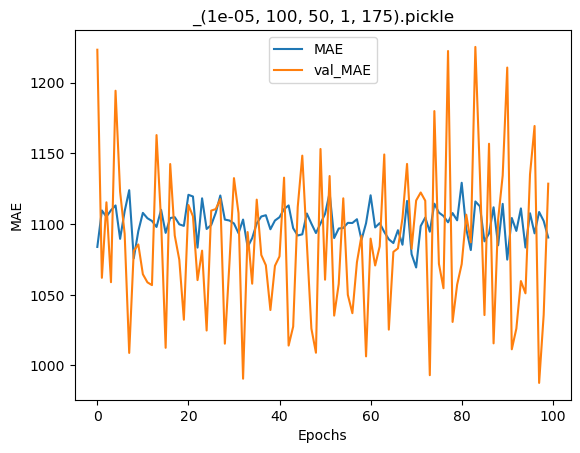

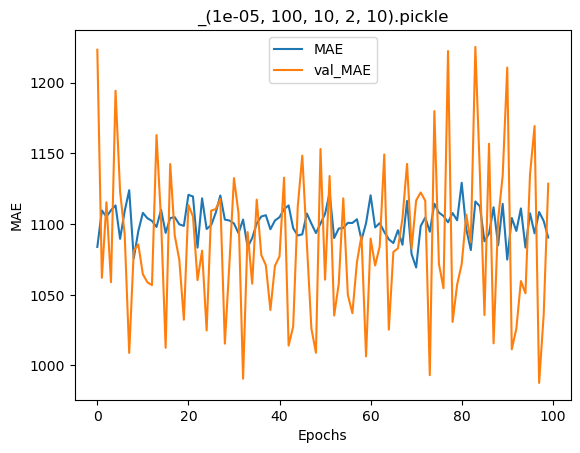

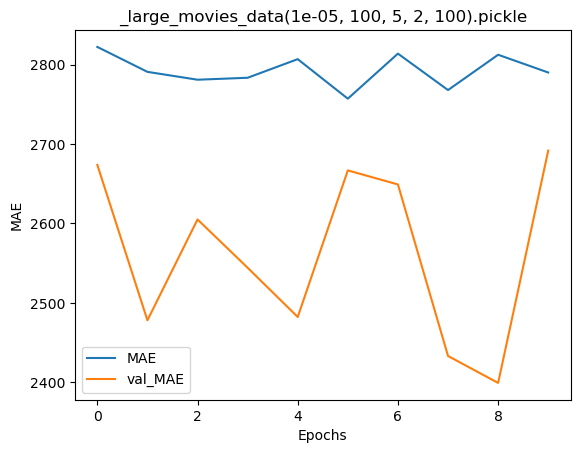

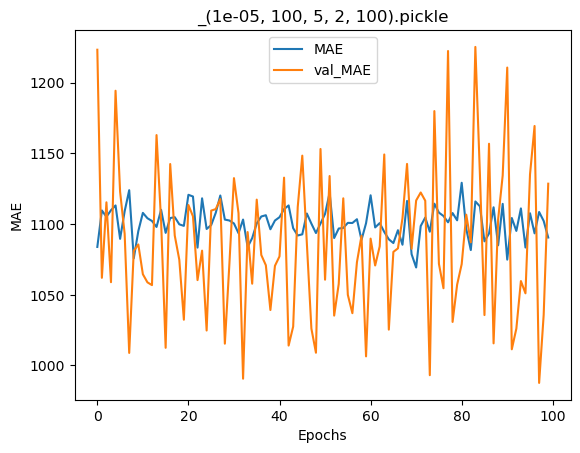

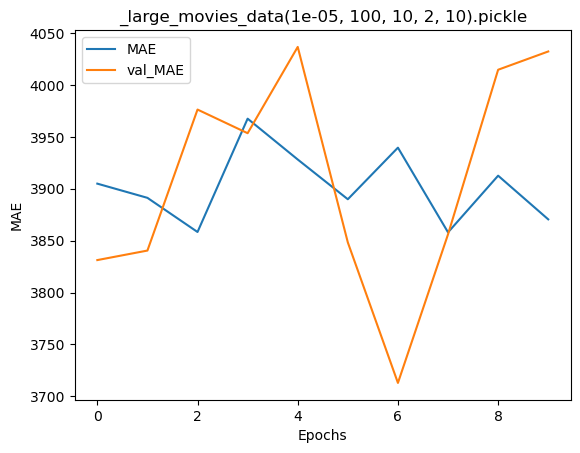

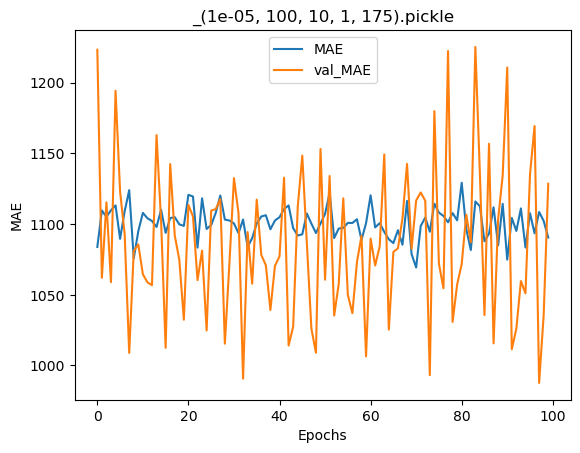

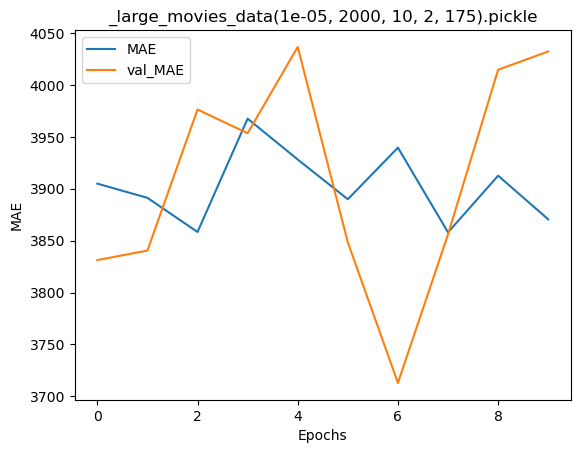

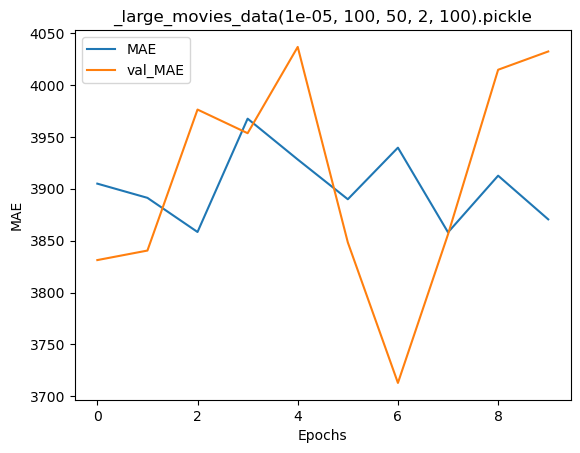

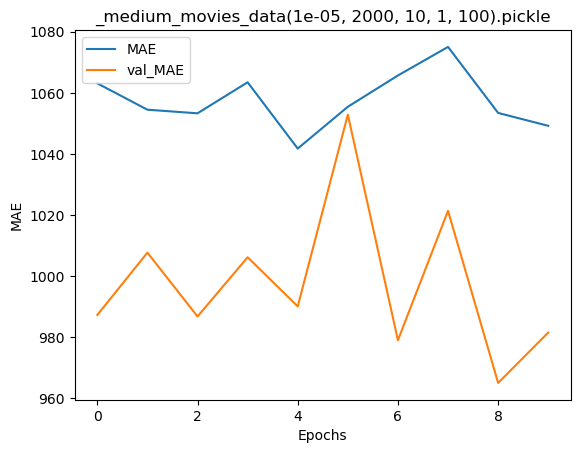

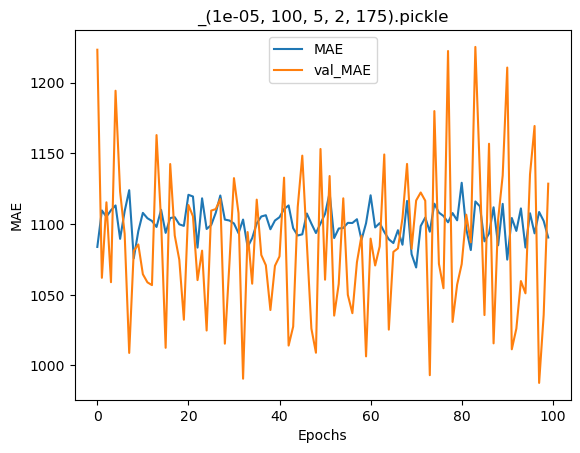

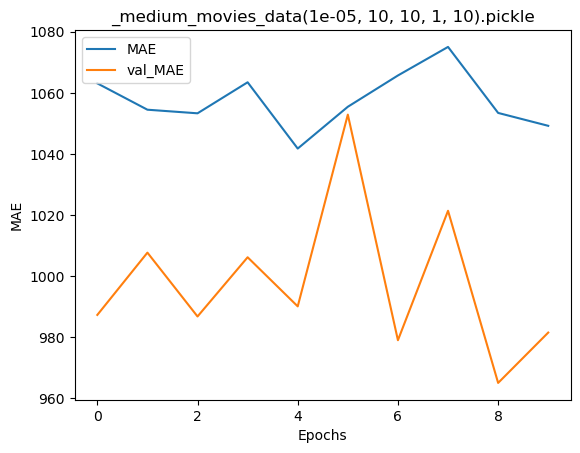

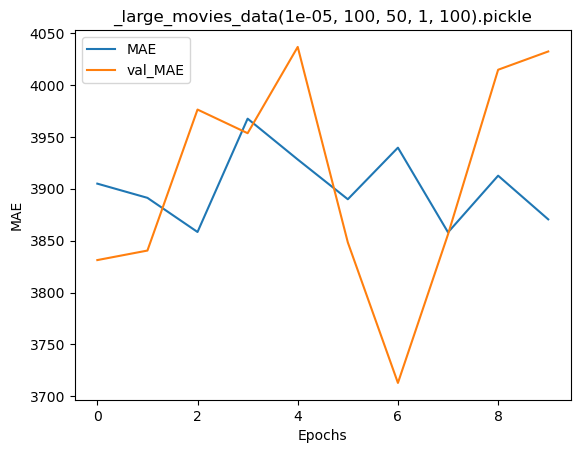

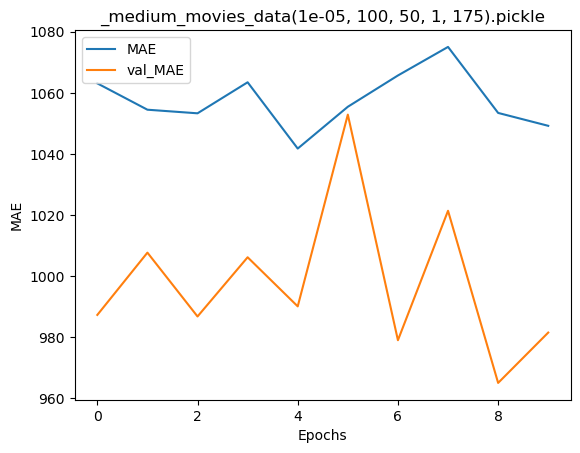

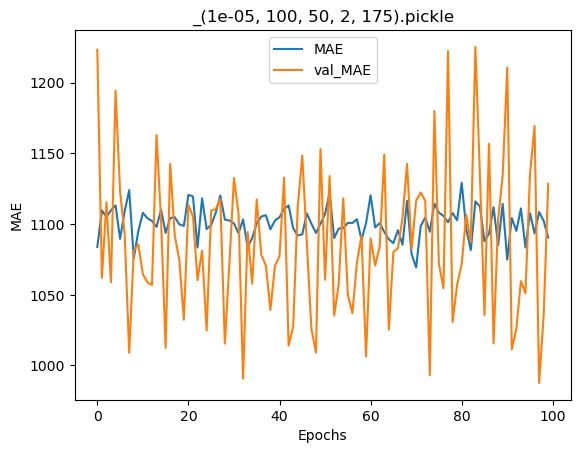

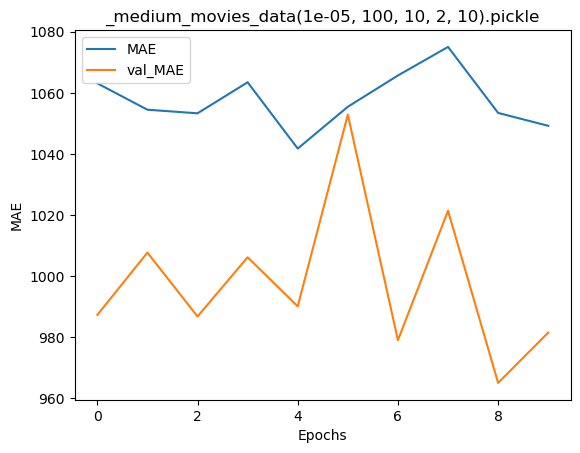

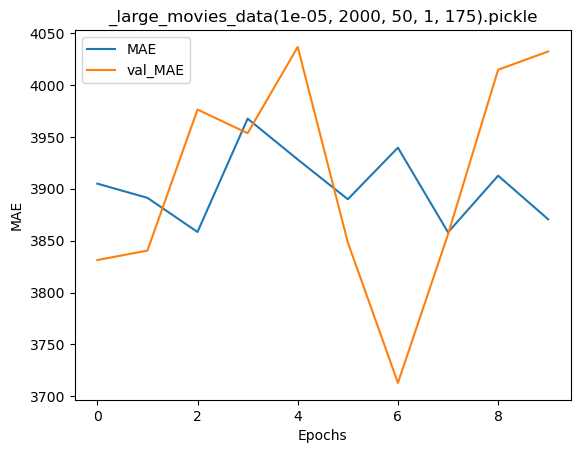

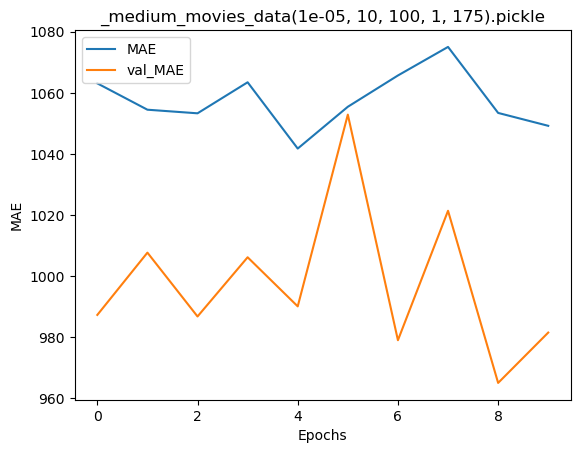

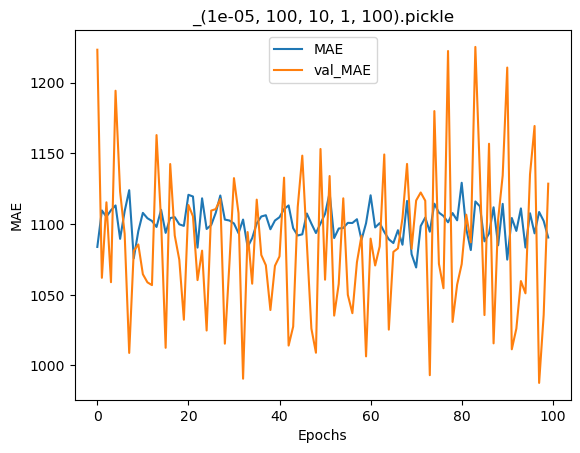

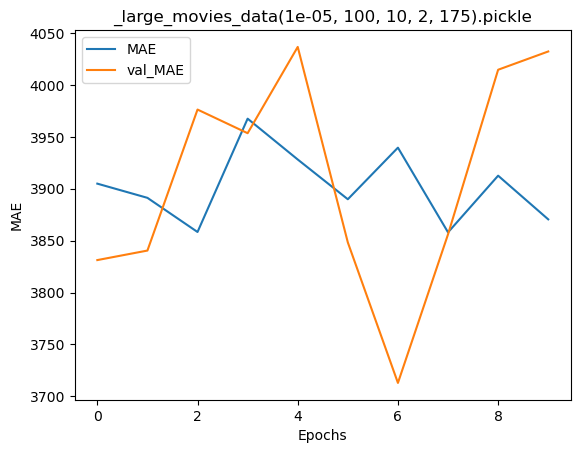

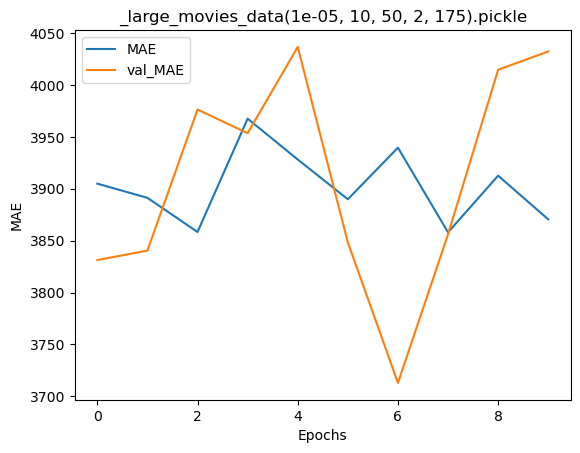

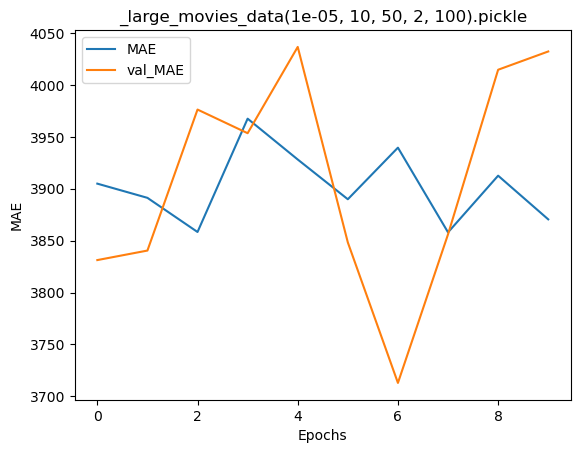

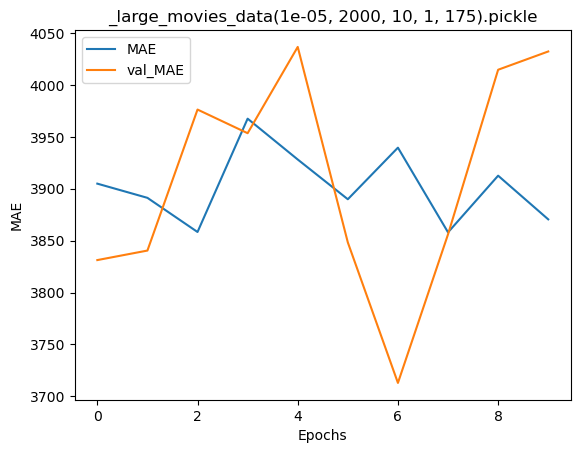

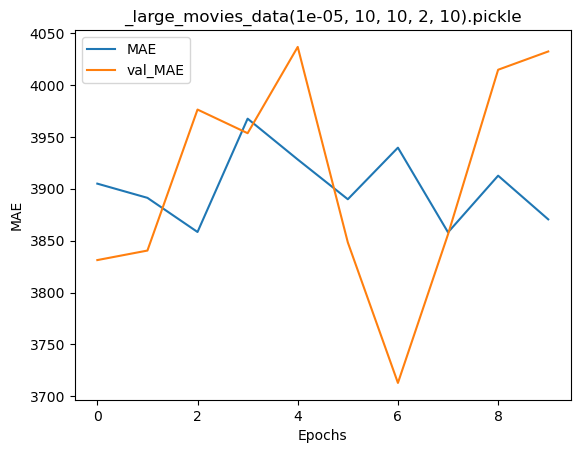

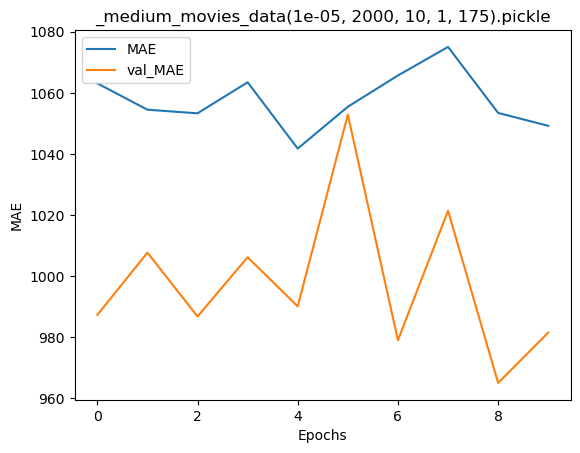

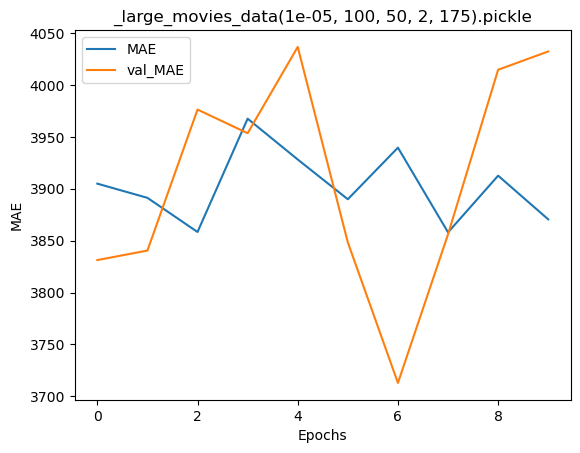

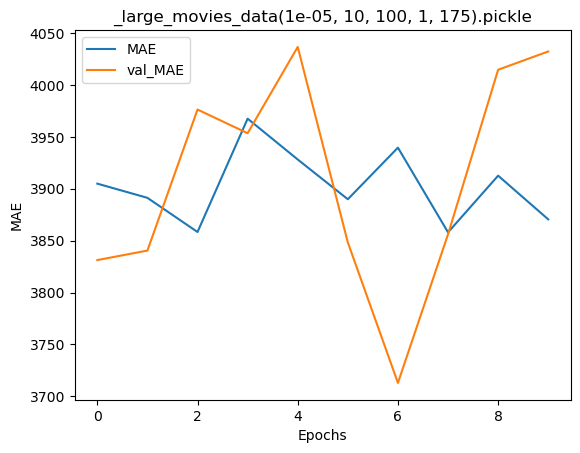

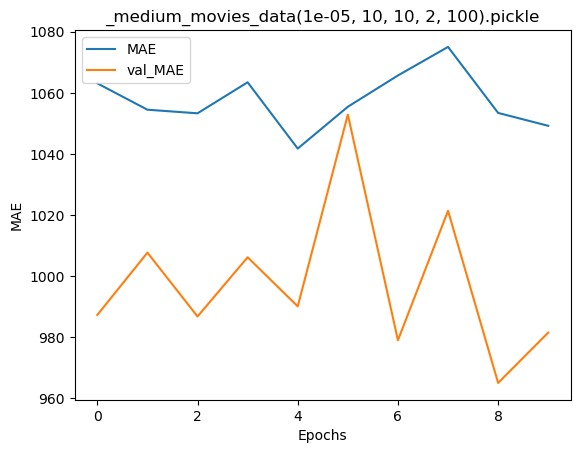

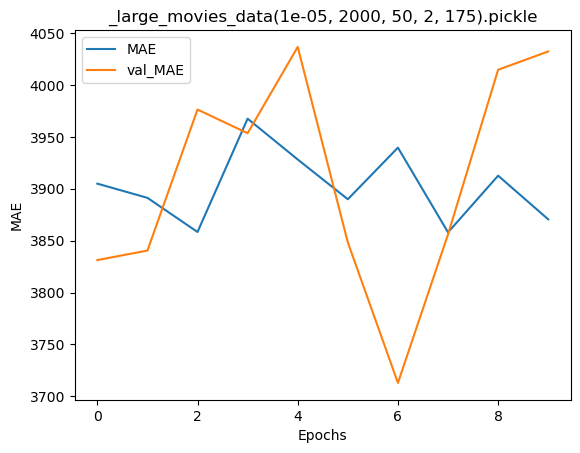

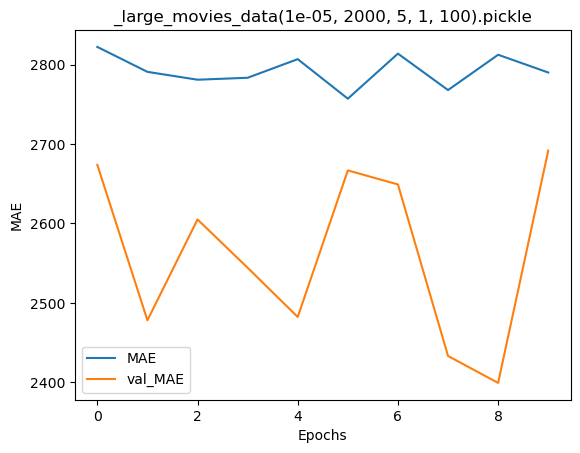

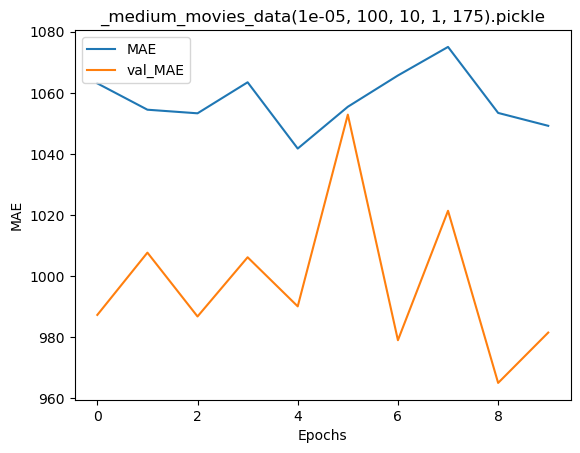

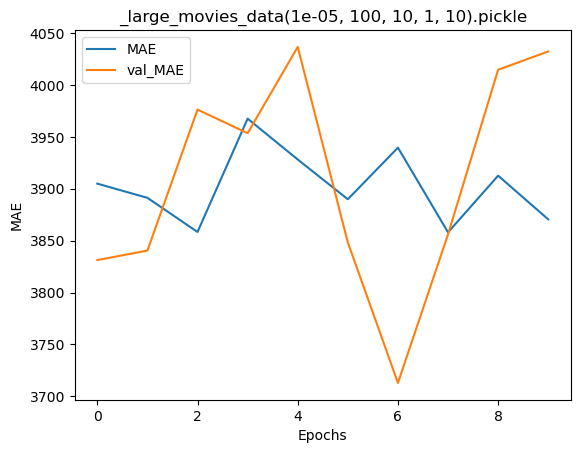

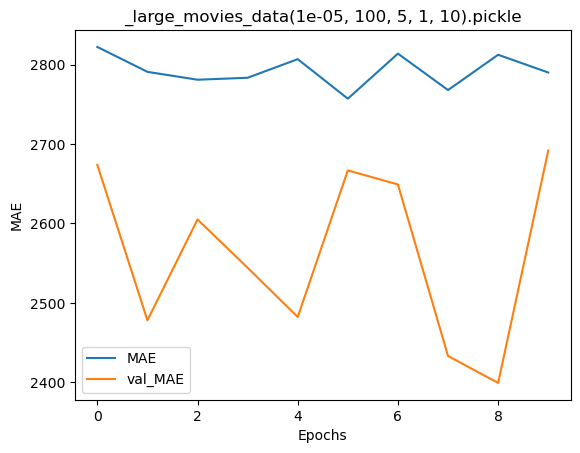

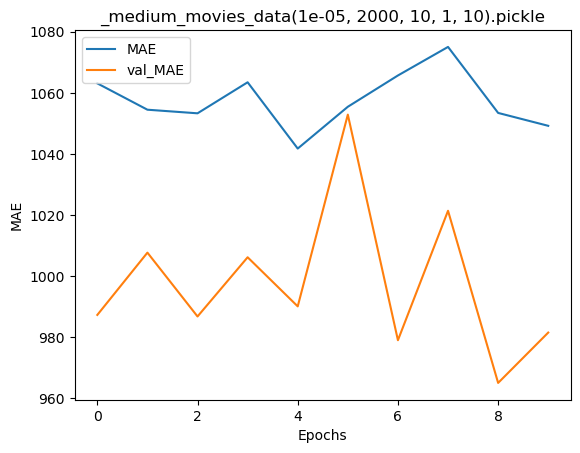

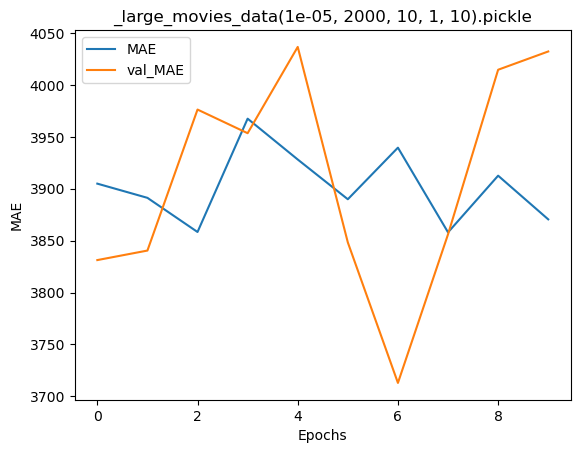

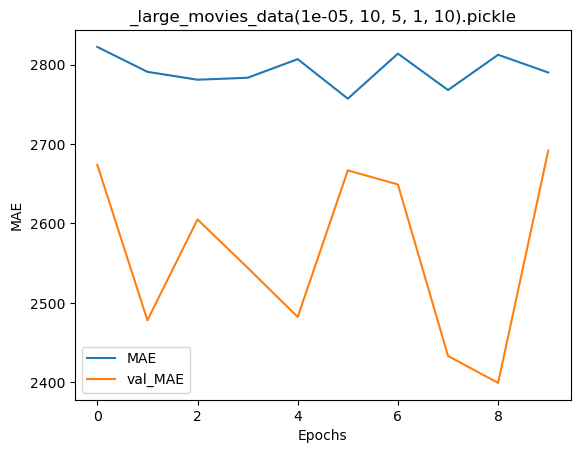

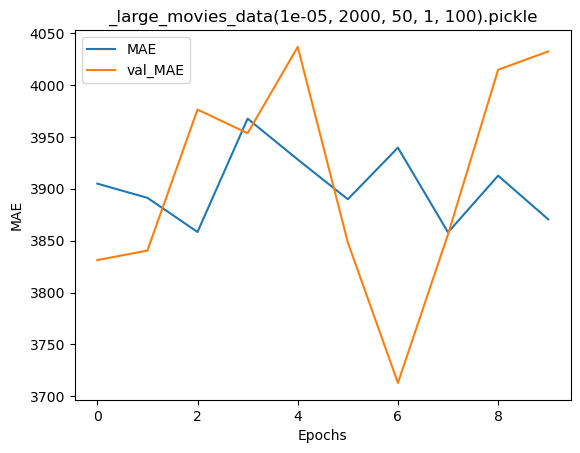

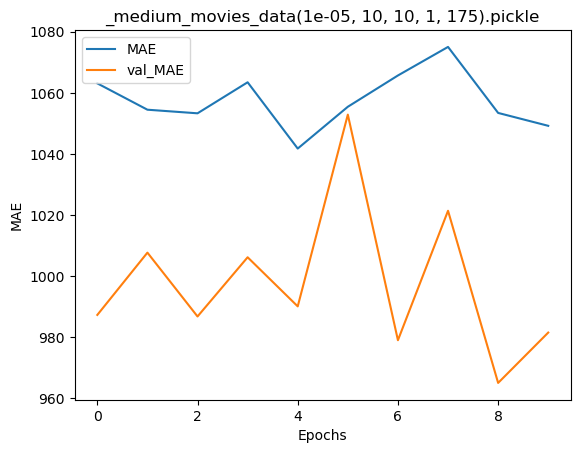

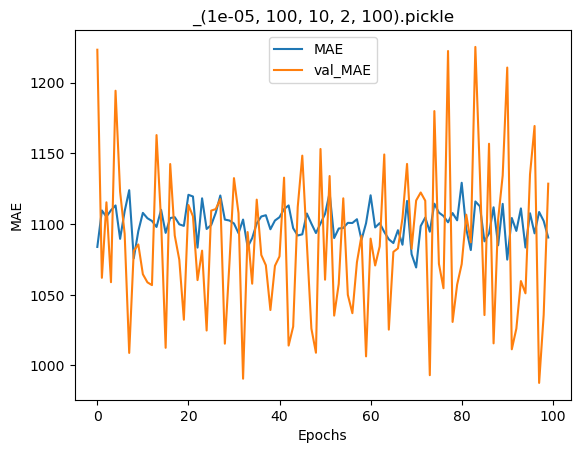

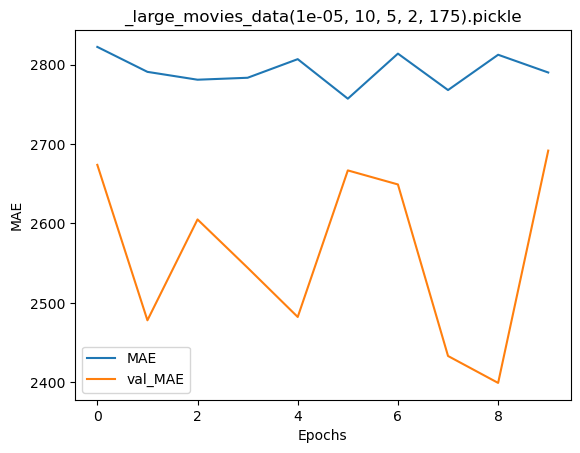

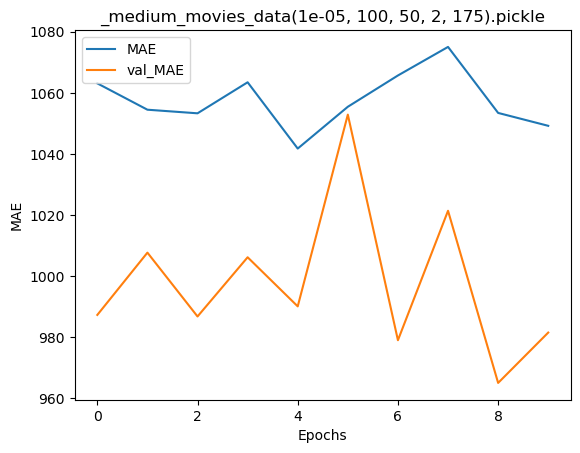

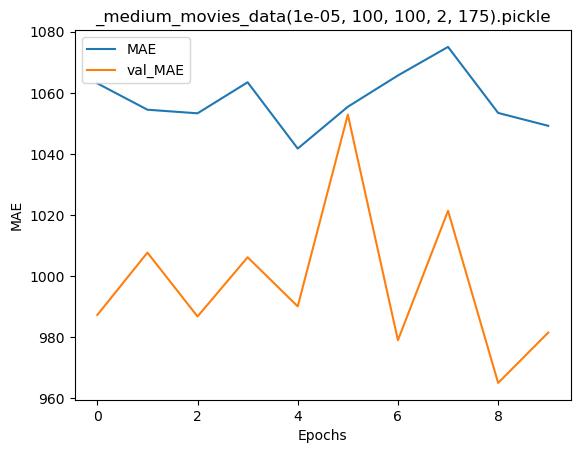

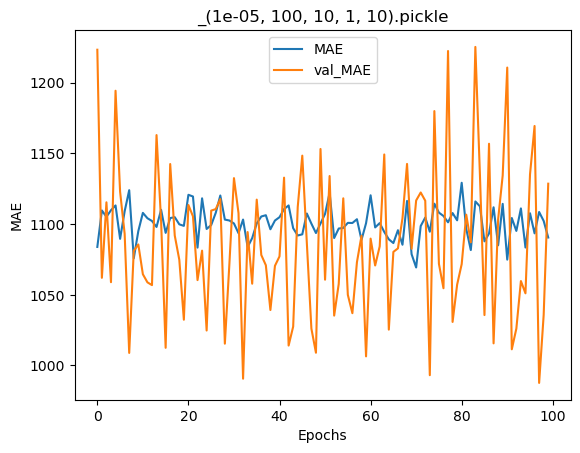

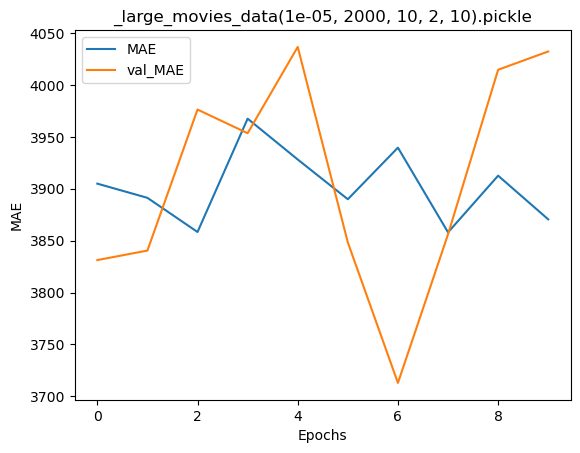

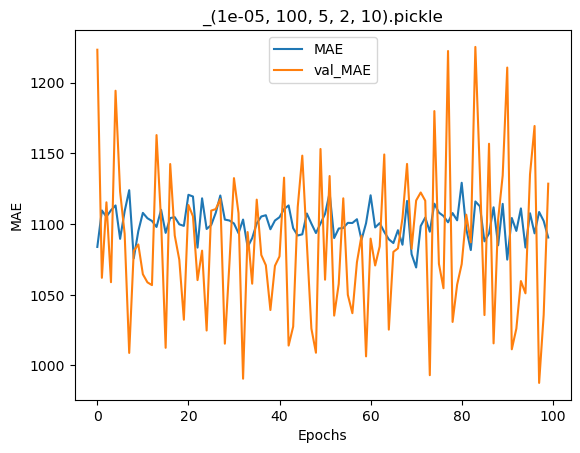

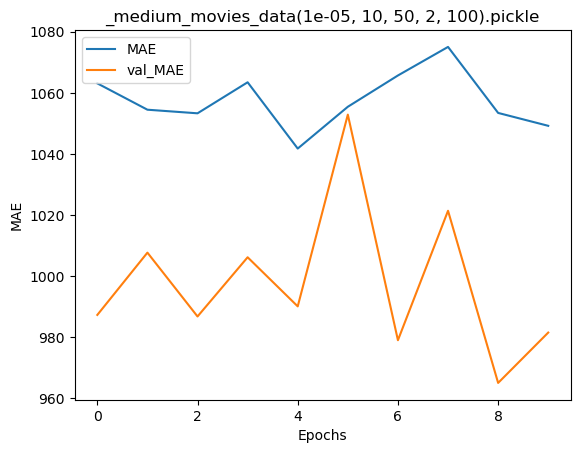

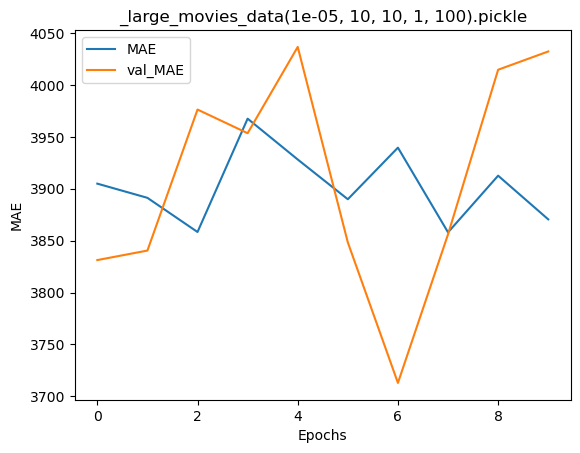

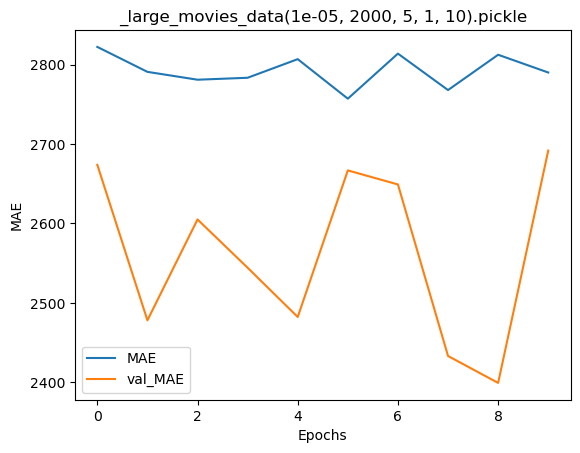

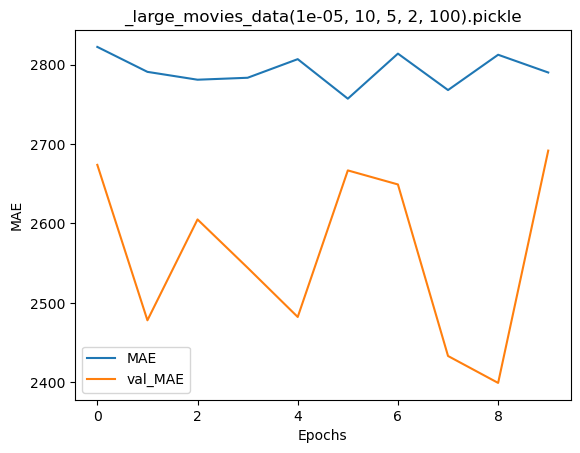

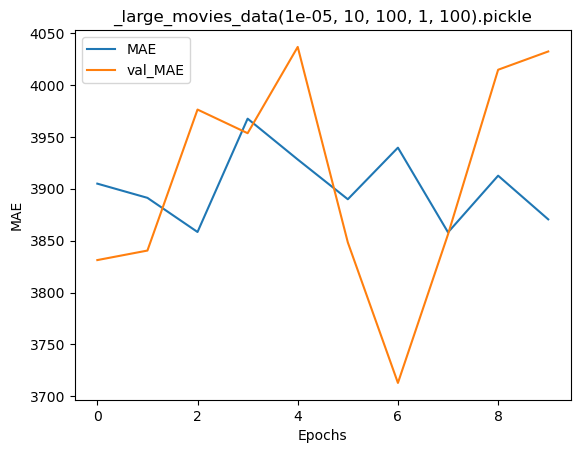

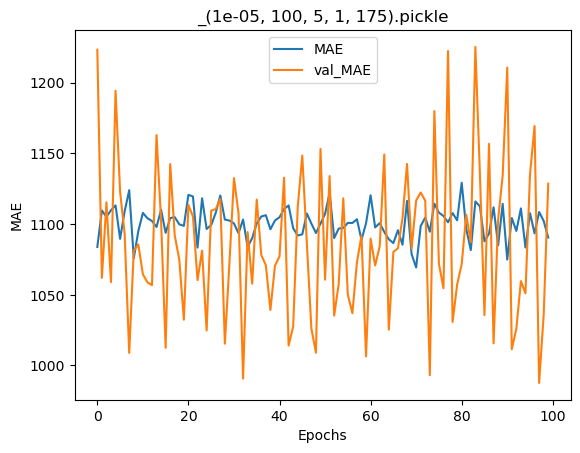

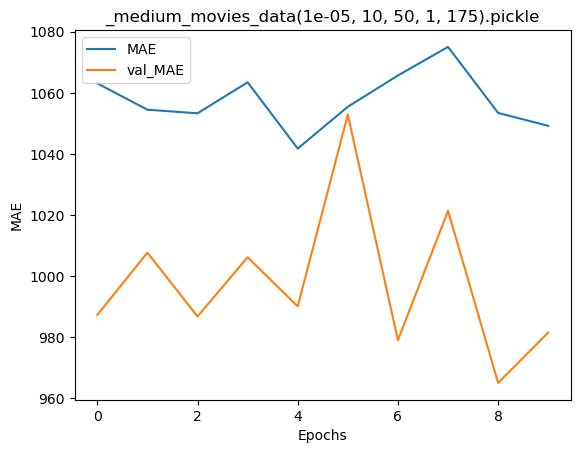

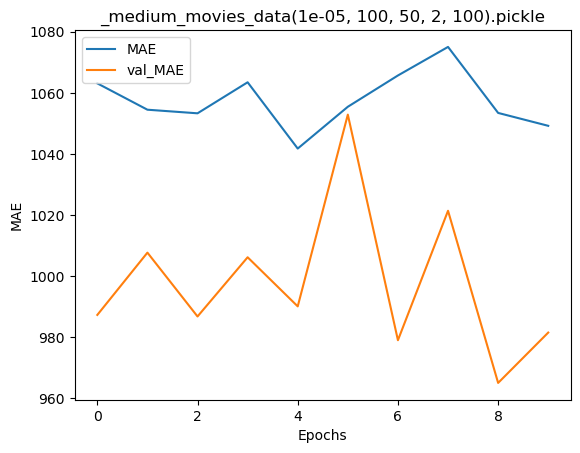

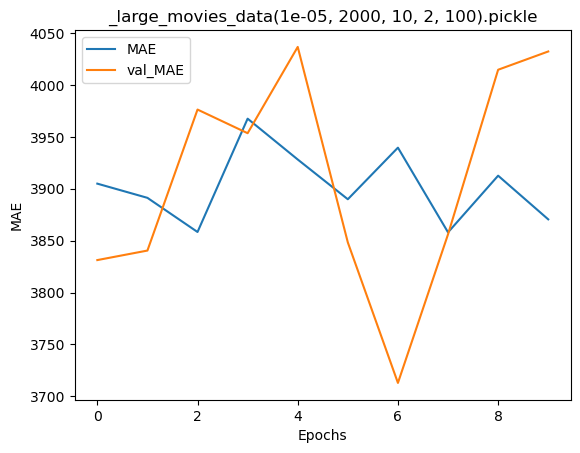

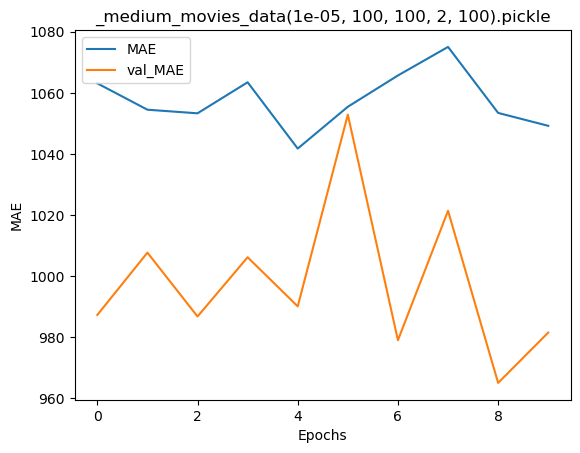

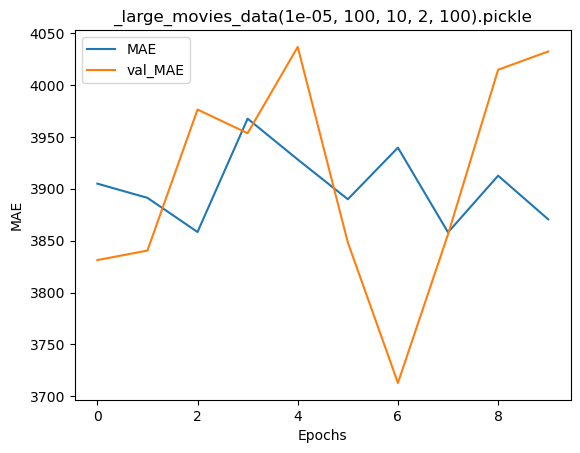

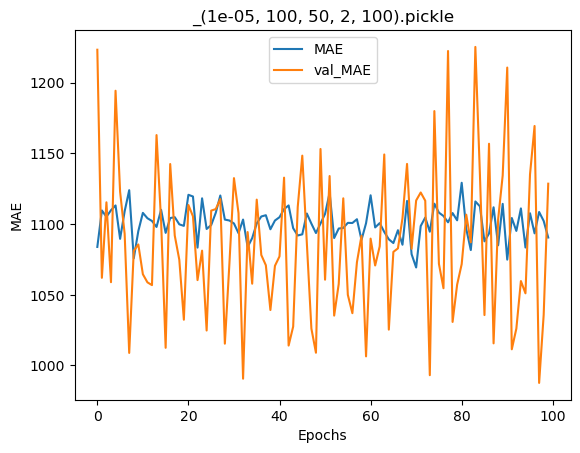

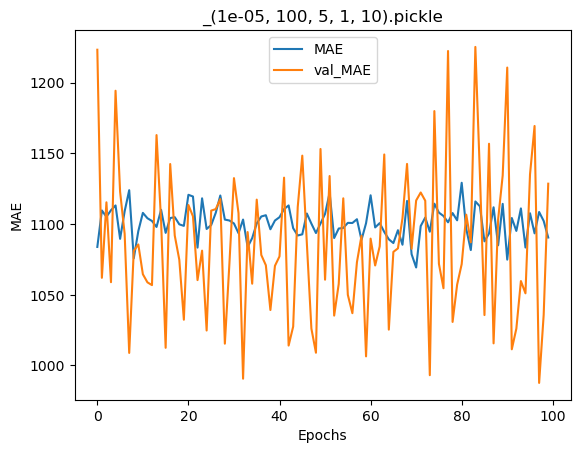

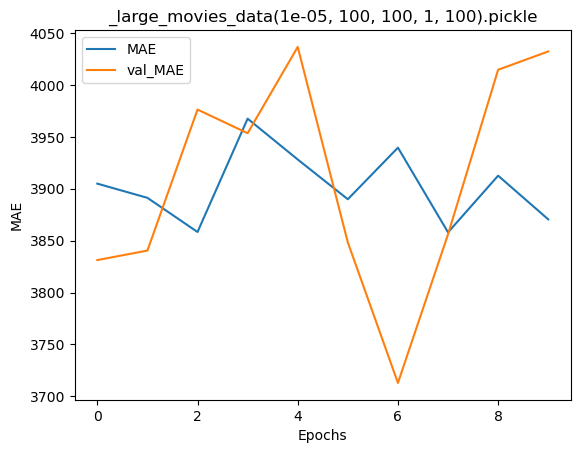

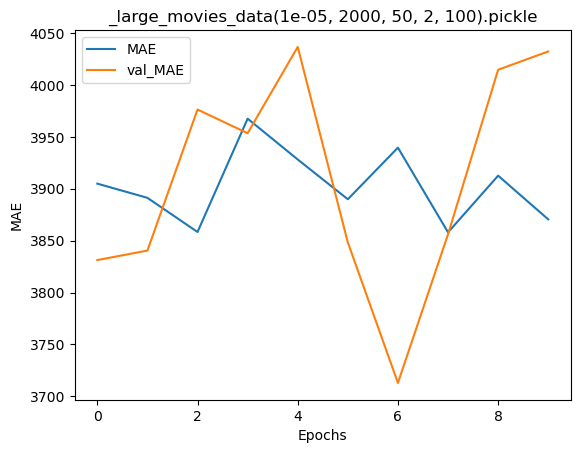

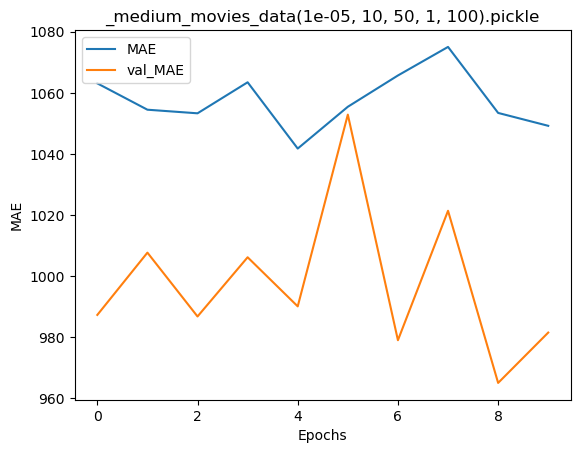

In [12]:

for file in files:
    with open(file, "rb") as fp:
        results = pickle.load(fp)
        k = list(results.keys())[0]
        train_loss = results[k]["train_loss"]
        val_loss = results[k]["val_loss"]
        config = file.split("LSTM-AE")[-1] # results[k]["config"]
        plot_graphs(
            train_loss=train_loss,
            val_loss=val_loss, 
            metric="MAE", 
            title=config
        )




